**Configuration**

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.6.tgz
!tar xf spark-2.4.5-bin-hadoop2.6.tgz
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.6"

In [0]:
import findspark
findspark.init("spark-2.4.5-bin-hadoop2.6")# SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [4]:
df = spark.createDataFrame([{"hello": "world"} for x in range(1000)])
df.show(3)

spark-2.4.5-bin-hadoop2.6/python/pyspark/sql/session.py:346: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


+-----+
|hello|
+-----+
|world|
|world|
|world|
+-----+
only showing top 3 rows



**RDD**

In [0]:
myRDD = spark.sparkContext.parallelize([('Ross',19),('Joe',22)])

In [6]:
myRDD.take(5)

[('Ross', 19), ('Joe', 22)]

In [10]:
from google.colab import files
data_to_load = files.upload()

Saving bayess_example.txt to bayess_example.txt


In [25]:
!pwd

/content


In [0]:
#data= "/train_titanic.csv"
data= "bayess_example.txt"

In [0]:
CSV_RDD =  spark.sparkContext.textFile(data,minPartitions=4)#.map( lambda element: element.split("\t"))

In [70]:
CSV_RDD.take(5)

['The first ABC-related ideas date back to the 1980s. Donald Rubin, when discussing the interpretation of Bayesian statements in 1984,[1] described a hypothetical sampling mechanism that yields a sample from the posterior distribution. This scheme was more of a conceptual thought experiment to demonstrate what type of manipulations are done when inferring the posterior distributions of parameters. The description of the sampling mechanism coincides exactly with that of the ABC-rejection scheme, and this article can be considered to be the first to describe approximate Bayesian computation. However, a two-stage quincunx was constructed by Francis Galton in the late 1800s that can be seen as a physical implementation of an ABC-rejection scheme for a single unknown (parameter) and a single observation.[2] Another prescient point was made by Rubin when he argued that in Bayesian inference, applied statisticians should not settle for analytically tractable models only, but instead consider 

In [54]:
CSV_RDD.getNumPartitions()

4

In [55]:
CSV_RDD.count()

3

In [0]:
def Func(lines):
  try:
    lines = lines.lower()
    lines = lines.split()
  except:
    pass
  return lines
split_rdd = CSV_RDD.map(Func)

In [0]:
split_rdd.take(1)

In [0]:
stopwords= ['a','all','the','as','is','am','and','be','been','from','of']

In [0]:
RDD1= split_rdd.filter(lambda x : x not in stopwords )

In [0]:
RDD1.take(1)

**Data Frames**

In [88]:
from google.colab import files
data_to_load = files.upload()

In [0]:
data= "train_titanic.csv"

In [0]:
df = spark.read.options(header="true",inferschema = "true").csv(data)

In [102]:
df.printSchema

<bound method DataFrame.printSchema of DataFrame[PassengerId: int, Survived: int, Pclass: int, Name: string, Sex: string, Age: double, SibSp: int, Parch: int, Ticket: string, Fare: double, Cabin: string, Embarked: string]>

In [103]:
df.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [104]:
df.count()

891

In [105]:
df.describe('Age').show()

+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|               714|
|   mean| 29.69911764705882|
| stddev|14.526497332334035|
|    min|              0.42|
|    max|              80.0|
+-------+------------------+



In [107]:
df.select('Survived','Pclass').show()

+--------+------+
|Survived|Pclass|
+--------+------+
|       0|     3|
|       1|     1|
|       1|     3|
|       1|     1|
|       0|     3|
|       0|     3|
|       0|     1|
|       0|     3|
|       1|     3|
|       1|     2|
|       1|     3|
|       1|     1|
|       0|     3|
|       0|     3|
|       0|     3|
|       1|     2|
|       0|     3|
|       1|     2|
|       0|     3|
|       1|     3|
+--------+------+
only showing top 20 rows



In [110]:
df.filter(df.Survived == 1).select('Sex').show()

+------+
|   Sex|
+------+
|female|
|female|
|female|
|female|
|female|
|female|
|female|
|female|
|  male|
|female|
|  male|
|female|
|  male|
|female|
|female|
|female|
|female|
|  male|
|female|
|female|
+------+
only showing top 20 rows



In [114]:
df.filter((df.Survived == 1) & (df.Sex =='male')).show(5)

+-----------+--------+------+--------------------+----+----+-----+-----+------+------+-----+--------+
|PassengerId|Survived|Pclass|                Name| Sex| Age|SibSp|Parch|Ticket|  Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+----+----+-----+-----+------+------+-----+--------+
|         18|       1|     2|Williams, Mr. Cha...|male|null|    0|    0|244373|  13.0| null|       S|
|         22|       1|     2|Beesley, Mr. Lawr...|male|34.0|    0|    0|248698|  13.0|  D56|       S|
|         24|       1|     1|Sloper, Mr. Willi...|male|28.0|    0|    0|113788|  35.5|   A6|       S|
|         37|       1|     3|    Mamee, Mr. Hanna|male|null|    0|    0|  2677|7.2292| null|       C|
|         56|       1|     1|   Woolner, Mr. Hugh|male|null|    0|    0| 19947|  35.5|  C52|       S|
+-----------+--------+------+--------------------+----+----+-----+-----+------+------+-----+--------+
only showing top 5 rows



In [0]:
df.filter((df.Survived == 1) & (df.Sex =='male')).orderBy('Age',ascending=False).show()

**SQL**

In [0]:
from pyspark.sql import SQLContext

In [0]:
sqlContext = SQLContext(spark.sparkContext)

In [0]:
df.registerTempTable('table') #Important

In [140]:
sqlContext.sql('select *   from table where Sex = "male" and Age > 20 order by Age desc  ').show(5)

+-----------+--------+------+--------------------+----+----+-----+-----+--------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name| Sex| Age|SibSp|Parch|  Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+----+----+-----+-----+--------+-------+-----+--------+
|        631|       1|     1|Barkworth, Mr. Al...|male|80.0|    0|    0|   27042|   30.0|  A23|       S|
|        852|       0|     3| Svensson, Mr. Johan|male|74.0|    0|    0|  347060|  7.775| null|       S|
|         97|       0|     1|Goldschmidt, Mr. ...|male|71.0|    0|    0|PC 17754|34.6542|   A5|       C|
|        494|       0|     1|Artagaveytia, Mr....|male|71.0|    0|    0|PC 17609|49.5042| null|       C|
|        117|       0|     3|Connors, Mr. Patrick|male|70.5|    0|    0|  370369|   7.75| null|       Q|
+-----------+--------+------+--------------------+----+----+-----+-----+--------+-------+-----+--------+
only showing top 5 rows



In [141]:
sqlContext.sql('select sex,count(*)   from table where Age > 20 group by sex  ').show(5)

+------+--------+
|   sex|count(1)|
+------+--------+
|female|     184|
|  male|     351|
+------+--------+



In [0]:
base2=sqlContext.sql('select sex,count(*)   from table where Age > 20 group by sex  ')

In [144]:
base2.show()

+------+--------+
|   sex|count(1)|
+------+--------+
|female|     184|
|  male|     351|
+------+--------+



In [151]:
sqlContext.sql('select max(Age)   from table where sex = "female"  ').show()

+--------+
|max(Age)|
+--------+
|    63.0|
+--------+



In [146]:
df.filter((df.Age > 20 ) & (df.Embarked == 'S')).groupby('sex').count().show()

+------+-----+
|   sex|count|
+------+-----+
|female|  135|
|  male|  282|
+------+-----+



In [149]:
df.fillna(0, subset=['Age']).show(10)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
|          6|       0|     3|    Moran, Mr. James|  male| 0.0|    0|    0|      

In [157]:
sqlContext.sql("""select *, 
                                      lag(Age, 1, 0) 
                                          over (partition by Sex order by Cabin) 
                                          as prev 
                               from table""").show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+----+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|prev|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+----+
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S| 0.0|
|          9|       1|     3|Johnson, Mrs. Osc...|female|27.0|    0|    2|          347742|11.1333| null|       S|26.0|
|         10|       1|     2|Nasser, Mrs. Nich...|female|14.0|    1|    0|          237736|30.0708| null|       C|27.0|
|         15|       0|     3|Vestrom, Miss. Hu...|female|14.0|    0|    0|          350406| 7.8542| null|       S|14.0|
|         16|       1|     2|Hewlett, Mrs. (Ma...|female|55.0|    0|    0|          248706|   16.0| null|       S|14.0|
+-----------+--------+------+-----------

In [0]:
df.registerTempTable('table2')

In [160]:
sqlContext.sql("""select A.*,B.Survived as S2 from table  A join table2 B on A.PassengerID =
B.PassengerID """).show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+---+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked| S2|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+---+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|  0|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|  1|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|  1|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|  1|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|  0|
+-----------+--------+------+-------------------

In [162]:
sqlContext.sql("""select *, CAST(Age as string) from table """).show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+----+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked| Age|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+----+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|22.0|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|38.0|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|26.0|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|35.0|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|35.0|
+-----------+--------+------+-----------

In [166]:
sqlContext.sql("""select sum(Age) from (select  Age from table)  a  """).show()

+--------+
|sum(Age)|
+--------+
|21205.17|
+--------+



In [172]:
sqlContext.sql("""select Survived, count(*) from table  group by Survived  """).show()

+--------+--------+
|Survived|count(1)|
+--------+--------+
|       1|     342|
|       0|     549|
+--------+--------+



In [173]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [0]:
df2 = df.dropna(thresh=2,subset=('Age','Sex'))

In [178]:
print(df.count())
print(df2.count())

891
714


In [0]:
df2.registerTempTable('final')

In [0]:
del df_final

In [0]:
df_final=df2.select('Age','Sex','Survived')
cols= df_final.columns

In [0]:
df_final = sqlContext.sql("""select Age,Sex,Survived from final """) # Con sql 

**Machine Learning**

In [0]:
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler

In [0]:
stages = []

categoricalColumns = ['Sex']
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
label_stringIdx = StringIndexer(inputCol = 'Survived', outputCol = 'label') # Genera columna de inputs
stages += [label_stringIdx]

numericCols = ['Age']
assemblerInputs =  [c + "classVec" for c in categoricalColumns] + numericCols 
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features") # genera columna de outputs
stages += [assembler]

In [214]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df_final)
df_final = pipelineModel.transform(df_final)
selectedCols = ['label', 'features'] + cols # Este cols viene de arriba
df_final = df_final.select(selectedCols)
df_final.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- Age: double (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Survived: integer (nullable = true)



In [237]:
df_final.show(5)

+-----+----------+----+------+--------+
|label|  features| Age|   Sex|Survived|
+-----+----------+----+------+--------+
|  0.0|[1.0,22.0]|22.0|  male|       0|
|  1.0|[0.0,38.0]|38.0|female|       1|
|  1.0|[0.0,26.0]|26.0|female|       1|
|  1.0|[0.0,35.0]|35.0|female|       1|
|  0.0|[1.0,35.0]|35.0|  male|       0|
+-----+----------+----+------+--------+
only showing top 5 rows



**Balancing Data**

In [239]:
df_final.groupby('Survived').count().show()

+--------+-----+
|Survived|count|
+--------+-----+
|       1|  290|
|       0|  424|
+--------+-----+



In [254]:
ss=df_final.filter(df_final.Survived==1).sample(True, 1.55, 100) #Oversampling
ns=df_final.filter(df_final.Survived==0)
print(ss.count())
print(ns.count())

431
424


In [0]:
df_concat = ss.union(ns)

**Train Test Split**

In [256]:
train, test = df_concat.randomSplit([0.7, 0.3], seed = 123)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 600
Test Dataset Count: 255


**Model**

In [0]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
lrModel = lr.fit(train)

[-2.58806832e+00 -1.66346736e-03]


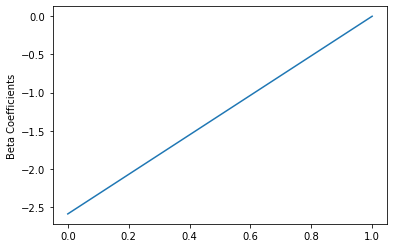

In [259]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lrModel.coefficients)
print(beta)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

ROC

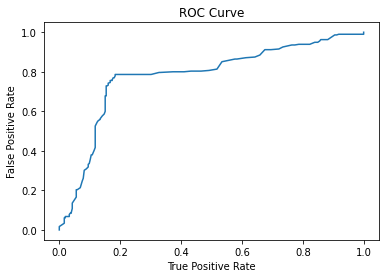

Training set areaUnderROC: 0.7779549874965274


In [260]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

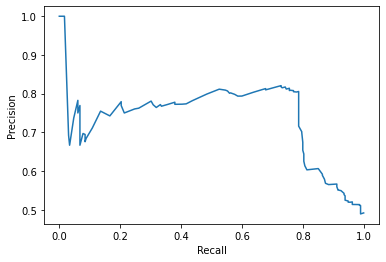

In [261]:
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [264]:
predictions = lrModel.transform(test)
print(predictions.count())
#predictions.select('Age', 'Sex','Survived','prediction', 'probability').show()
predictions.registerTempTable("predictions")
confusion=sqlContext.sql("""select  Survived, prediction , count(*) from predictions  group by Survived , prediction  """) # Con sql 
confusion= confusion.toPandas()
confusion.pivot(index='Survived',columns='prediction',values='count(1)')

255


prediction,0.0,1.0
Survived,,
0,102,17
1,42,94


In [265]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.8071861097380125


**Decision Tree**

In [266]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.select('Age','Sex', 'prediction', 'probability').show(10)

+----+------+----------+--------------------+
| Age|   Sex|prediction|         probability|
+----+------+----------+--------------------+
|0.75|female|       1.0|[0.18359375,0.816...|
| 1.0|female|       1.0|[0.18359375,0.816...|
| 1.0|female|       1.0|[0.18359375,0.816...|
| 2.0|female|       1.0|[0.18359375,0.816...|
| 2.0|female|       1.0|[0.18359375,0.816...|
| 3.0|female|       1.0|[0.18359375,0.816...|
| 4.0|female|       1.0|[0.18359375,0.816...|
| 4.0|female|       1.0|[0.18359375,0.816...|
| 5.0|female|       1.0|[0.18359375,0.816...|
| 6.0|female|       1.0|[0.18359375,0.816...|
+----+------+----------+--------------------+
only showing top 10 rows



In [267]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7530276816608998


In [288]:
print(dtModel.toDebugString) # Como llevamos esto a un WOE ?? !!!!!!!!!!!!!!!

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_0f34a13a3404) of depth 2 with 5 nodes
  If (feature 0 in {1.0})
   If (feature 1 <= 15.5)
    Predict: 1.0
   Else (feature 1 > 15.5)
    Predict: 0.0
  Else (feature 0 not in {1.0})
   Predict: 1.0



**Random Forest Classifier**

In [268]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.select('Age','Sex', 'prediction', 'probability').show(10)

+----+------+----------+--------------------+
| Age|   Sex|prediction|         probability|
+----+------+----------+--------------------+
|0.75|female|       1.0|[0.23369671646134...|
| 1.0|female|       1.0|[0.23369671646134...|
| 1.0|female|       1.0|[0.23369671646134...|
| 2.0|female|       1.0|[0.23369671646134...|
| 2.0|female|       1.0|[0.23369671646134...|
| 3.0|female|       1.0|[0.23369671646134...|
| 4.0|female|       1.0|[0.23369671646134...|
| 4.0|female|       1.0|[0.23369671646134...|
| 5.0|female|       1.0|[0.23369671646134...|
| 6.0|female|       1.0|[0.41128276969956...|
+----+------+----------+--------------------+
only showing top 10 rows



In [269]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8122219476025705


**Gradient-Boosted Tree Classifie**r

In [270]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter=10)
gbtModel = gbt.fit(train)
predictions = gbtModel.transform(test)
predictions.select('Age','Sex', 'prediction', 'probability').show(10)

+----+------+----------+--------------------+
| Age|   Sex|prediction|         probability|
+----+------+----------+--------------------+
|0.75|female|       1.0|[0.28183941241802...|
| 1.0|female|       1.0|[0.28183941241802...|
| 1.0|female|       1.0|[0.28183941241802...|
| 2.0|female|       1.0|[0.28183941241802...|
| 2.0|female|       1.0|[0.28183941241802...|
| 3.0|female|       1.0|[0.13271854992638...|
| 4.0|female|       1.0|[0.13271854992638...|
| 4.0|female|       1.0|[0.13271854992638...|
| 5.0|female|       1.0|[0.13271854992638...|
| 6.0|female|       0.0|[0.62892419777388...|
+----+------+----------+--------------------+
only showing top 10 rows



In [271]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8192041522491348


In [272]:
print(gbt.explainParams())

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: 'auto' (choose automatically for task: If numTrees == 1, set to 'all'. If numTrees > 1 (forest), set to 'sqrt' for classification and to 'onethird' for regression), 'all' (use all features), 'onethird' (use 1/3 of the features), 'sqrt' (use sqrt(number of features)), 'log2' (use log2(number of features)), 

In [273]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
paramGrid = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 4, 6])
             .addGrid(gbt.maxBins, [20, 60])
             .addGrid(gbt.maxIter, [10, 20])
             .build())
cv = CrossValidator(estimator=gbt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)
# Run cross validations.  This can take about 6 minutes since it is training over 20 trees!
cvModel = cv.fit(train)
predictions = cvModel.transform(test)
evaluator.evaluate(predictions)

0.8034478497281264